In [ ]:
# Date: 2025.10.08
# Author: Mihai ANDRIES

## 1. Launch the pyBullet simulator

### 1.1 Import the required libraries

In [1]:
%load_ext autoreload
%autoreload 2
import pybullet as p
import numpy as np
import math
import time
from pandapybullet_minimal.panda_sim import PandaSim
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as path # for loading objects into the scene

pybullet build time: Oct  9 2025 16:16:35


### 1.2 Instantiate a simulation with the Panda robotic arm on top of a table.

In [2]:
panda_sim = PandaSim()

Scene setup
Gravity set to: (0, 0, -10.0)
Table Id: 1
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=AMD
GL_RENDERER=AMD Radeon 780M (radeonsi, phoenix, LLVM 20.1.2, DRM 3.61, 6.14.0-33-generic)
GL_VERSION=4.6 (Core Profile) Mesa 25.0.7-0ubuntu0.25.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 25.0.7-0ubuntu0.25.04.2
Vendor = AMD
Renderer = AMD Radeon 780M (radeonsi, phoenix, LLVM 20.1.2, DRM 3.61, 6.14.0-33-generic)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = AMD
ven = AMD
b3Printf: b3Warnin

### 1.3 Define some useful functions for later use.
- spawnObject(...)
- removeAllSpawnedObjects()
- printObjectPose(objectId)
- printSpawnedObjectsIds()

In [3]:
objectsIdsSpawned = []

def spawnObject(
        objectPath, 
        objectPosition=[0,0,0], 
        objectOrientation=p.getQuaternionFromEuler([0.0, 0.0, 0.0]), 
        scaling=1.0):
    print("Trying to spawn at {} with orientation {}".format(objectPosition, objectOrientation));
    print("Loading the URDF file...");
    # Load (spawn) the object into the scene
    objectIdSpawned = p.loadURDF(fileName=objectPath,
                        basePosition=objectPosition,
                        baseOrientation=objectOrientation,
                        useMaximalCoordinates=0, # bug: https://github.com/bulletphysics/bullet3/issues/4128
                        useFixedBase=0,
                        globalScaling = scaling
                        );
    print("Object created with id: {}".format(objectIdSpawned));
    printObjectPose(objectIdSpawned);
    global objectsIdsSpawned;
    objectsIdsSpawned.append(objectIdSpawned);
    return objectIdSpawned;

# Displays information about the objects in the scene
def printSpawnedObjectsIds():
    numBodiesInScene = p.getNumBodies()
    print("Bodies in the scene: {}".format(numBodiesInScene));
    global objectsIdsSpawned;
    for objectId in objectsIdsSpawned:
        print("\nBody id: {}".format(objectId));
        try:
            bodyInfo = p.getBodyInfo(objectId);
            print("Body Info: {}".format(bodyInfo));
            printObjectPose(objectId);
        except:
            print("An exception occured");
    return
        
# Removes an object from simulation and 
# updates the list of spawned objects 
# that still exist in simulation
def removeObject(objectId):
    # Remove the object from simulation
    p.removeBody(objectId);
    # Remove the object from our list of spawned objects.
    global objectsIdsSpawned;
    objectsIdsSpawned.remove(objectId);
    return 
    
# Removes all spawned objects in the scene 
# (except for the floor plane, the table, and the robot.)
def removeAllSpawnedObjects():
    global objectsIdsSpawned;
    for objectId in objectsIdsSpawned:
        removeObject(objectId);
        # p.removeBody(objectId);
    return;
        
def printObjectPose(objectId):
    # Get position and orientation
    objectPosition, objectOrientationQuaternion = p.getBasePositionAndOrientation(objectId);
    # Print object position and orientation
    print("Object position: \n{}".format(objectPosition));
    # print("Object orientation Quaternion: \n{}".format(objectOrientationQuaternion));
    print("Object orientation Euler: \n{}".format(p.getEulerFromQuaternion(objectOrientationQuaternion)));
    return 

## 2. How to interact with the robot? How to change  the robot state?

### 2.1 Define some time constants for the simulation

In [4]:
sim_sleep_time = 1./240 #By default the simulation step of pyBullet is 1./240
simulation_steps = 480 #Corresponds to 2 seconds

In [5]:
# Function used to progress time in the simulation by n seconds.
def sleepNSeconds(n=1.0):
    simulation_steps = int(n / sim_sleep_time);
    # print(seconds);
    for i in range(simulation_steps):
        time.sleep(sim_sleep_time)
        p.stepSimulation()
        
def resetArmToTableViewingPosition():
    # Reset the arm in the table-viewing position
    simulation_steps = 480
    sim_sleep_time = 1./240 #By default the simulation step of pyBullet is 1./240

    for i in range(simulation_steps):

        controlPositions = [-0.2, 0.0, 0.0, -math.pi / 2.0, 0.0, math.pi / 2.0, math.pi / 4.0]
        panda_sim.send_position(controlPositions)

        time.sleep(sim_sleep_time)

In [ ]:
# Warning: do not use during simulation as it overrides physics
# panda_sim.set_q((-0.2, 0.0, 0.0, -math.pi / 2.0, 0.0, math.pi / 2.0, math.pi / 4.0))

### 2.2 Control the robot

#### 2.2.a Velocity control
Uncomment the code to run it.

In [ ]:
# for i in range(simulation_steps):

#     controlVelocities = [.1]*7
#     panda_sim.send_velocity(controlVelocities)
         
#     time.sleep(sim_sleep_time)

#### 2.2.b Position control
Uncomment the code to run it.

In [ ]:
# simulation_steps = 480
# sim_sleep_time = 1./240 #By default the simulation step of pyBullet is 1./240

# for i in range(simulation_steps):

#     controlPositions = [-0.2, 0.0, 0.0, -math.pi / 2.0, 0.0, math.pi / 2.0, math.pi / 4.0]
#     panda_sim.send_position(controlPositions)
      
#     time.sleep(sim_sleep_time)

#### (!) Tip: Camera movement is possible now

### 2.3 How to run the simulation faster than real-time?
You can run the simulation faster than realtime (if you need to do RL for example).   
(Uncomment the code to run it)

In [ ]:
# start = time.time()

# # Velocity control example (start)
# for i in range(simulation_steps):

#     controlVelocities = [.1]*7
#     panda_sim.send_velocity(controlVelocities)
# # Velocity control example (end)    
    
# elapsed = time.time()-start
# print('We just simulated {:.1f} seconds of robot time in {:.1f} seconds'.format(simulation_steps/240, elapsed))

#### 2.3.2 Reset the arm in the table-viewing position

In [6]:
# Reset the arm in the table-viewing position
simulation_steps = 480
sim_sleep_time = 1./240 #By default the simulation step of pyBullet is 1./240

for i in range(simulation_steps):

    controlPositions = [-0.2, 0.0, 0.0, -math.pi / 2.0, 0.0, math.pi / 2.0, math.pi / 4.0]
    panda_sim.send_position(controlPositions)
      
    time.sleep(sim_sleep_time)

### 2.4 How to use the camera on the end-effector?

#### 2.4.1 Display the images seen by the camera inside the simulator (rgb, depth, segmentation masks)

In [7]:
# Acquire data from camera
rgb, depth, seg = panda_sim.grab_eye_in_hand_camera_frame()

#### 2.4.2 Display below the images seen by the camera (rgb, depth, segmentation)

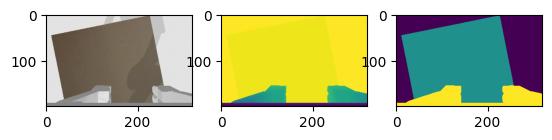

In [8]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(rgb)
axes[1].imshow(depth)
axes[2].imshow(seg)

#### 2.4.3 How fast is the camera? How many frames can we get per second? How much time is required per frame?
Warning: this function is a bit slow
(Uncomment the code to run it)

In [ ]:
# %timeit panda_sim.grab_eye_in_hand_camera_frame()

### 2.5 How to get the robot state?

You can get joint values, joint velocities and jacobian with this function:

In [9]:
q, dq, J = panda_sim.get_qdq_J()

In [ ]:
#### 2.5.1 What is the dimension of the Jacobian matrix?

In [10]:
print(J.shape)

(6, 7)


The position of the end-effector of the robot can be queried:

In [11]:
panda_sim.get_x()

array([ 0.54341489, -0.11026741,  1.5044322 ])

### 2.6 Other possibilities for robot control
- Torque control is possible with panda_sim.send_torque('tuple of size 7')
- Cartesian control with fixed orientation is also available with panda_sim.send_cartesian_velocity('tuple of size 3')
- Realtime simulation is possible (panda_sim = PandaSim(realtime=True)). In realtime you can move the robot with the mouse, which can be useful

And of course all of the functionalities of pyBullet!

See https://pythonhosted.org/pybullet/ for the documentation

An example of how to use a pyBullet function:

In [12]:
print(panda_sim);

In [13]:
pos, quat = p.getBasePositionAndOrientation(panda_sim.robot_id);
print('Position of the base of the robot:{}'.format(pos));
print('Orientation of the base of the robot (quaternion):{}'.format(quat));
print('Orientation of the base of the robot (Euler):{}'.format(p.getEulerFromQuaternion(quat)));

Position of the base of the robot:(0.0, 0.0, 0.88)
Orientation of the base of the robot (quaternion):(0.0, 0.0, 0.0, 1.0)
Orientation of the base of the robot (Euler):(0.0, -0.0, 0.0)


# 3. Adding objects into the scene

When importing objects using their relative paths, it is useful to know your current working directory:

In [14]:
import os
print(os.getcwd());

/home/axel/graspingTP


### 3.1 Compute where to spawn the objects (we want them on the table)
Identify the location (x,y,z) where you want to spawn the object to grasp.
It should be on top of the table, in the middle, visible to the camera.

Use the PyBullet documentation to identify the appopriate function to use.   
Hint 1: see getCollisionShapeData(...)   
Hint 2: The table has id=1. You will need this information to call the function from Hint 1.

In [15]:
# Fill in the code here.
table_id = 1
collision_shape_data = p.getCollisionShapeData(table_id, -1)
print("Table collision shape data:", collision_shape_data)

# Extract table dimensions and position
table_dimensions = collision_shape_data[0][3]  # dimensions of the collision shape
print("Table dimensions:", table_dimensions)

# Get the table's base position
table_pos, table_orn = p.getBasePositionAndOrientation(table_id)
print("Table position:", table_pos)

# Calculate spawn position: on top of the table, in the middle
spawn_x = table_pos[0] + 0.0  # center of table in x
spawn_y = table_pos[1] + 0.0  # center of table in y
spawn_z = table_pos[2] + table_dimensions[2] + 0.1  # on top of table with 0.1m clearance

spawn_position = [spawn_x, spawn_y-0.15, spawn_z+0.8]
print("Object spawn position:", spawn_position)

Table collision shape data: ((1, -1, 3, (1.02, 0.75, 0.03), b'', (0.0, 0.0, 0.865), (0.0, 0.0, 0.0, 1.0)),)
Table dimensions: (1.02, 0.75, 0.03)
Table position: (0.35, 0.0, 0.0)
Object spawn position: [0.35, -0.15, 0.93]


### 3.2 Load the object into the scene

Spawn the object to grasp. 
Use the right position and orientation for your object.
   
Hint 3: You may use the function "spawnObject" defined in one of the cells above.

In [16]:
objectPath = "./objectsToGrasp/shapegen/cube.urdf";
# Use scaling factor 0.04 when spawning this object.

In [17]:
# Fill in the code here to spawn this object into the scene.
objectToGraspId = spawnObject(
    objectPath=objectPath,
    objectPosition=spawn_position,
    objectOrientation=p.getQuaternionFromEuler([0.0, 0.0, 0.0]),
    scaling=0.04
)
print("Object spawned with ID:", objectToGraspId)

Trying to spawn at [0.35, -0.15, 0.93] with orientation (0.0, 0.0, 0.0, 1.0)
Loading the URDF file...
Object created with id: 3
Object position: 
(0.43, -0.15, 0.93)
Object orientation Euler: 
(0.0, -0.0, 0.0)
Object spawned with ID: 3


### 3.3 Print list of objects in scene

In [18]:
printSpawnedObjectsIds();    
# p.syncBodyInfo();

Bodies in the scene: 4

Body id: 3
Body Info: (b'cube', b'simple_box2')
Object position: 
(0.43, -0.15, 0.93)
Object orientation Euler: 
(0.0, -0.0, 0.0)


### 3.4 Let the object drop onto the table

Hint 5: Use the function "sleepNSeconds".

In [19]:
# Fill in the code here.
sleepNSeconds(2.0)
print("Object has settled on the table")

Object has settled on the table


### 3.5 Remove object from scene (if required)
Uncomment the code to run it.

In [88]:
 print("Removing object with id: {}".format(objectToGraspId));
 removeObject(objectToGraspId);
 # removeAllSpawnedObjects();
 print("Object removed!");

Removing object with id: 3
Object removed!


Error in behaviour: removes a part (link) of the robot, not the object.
Why? It is related to the spawning of objects
https://github.com/bulletphysics/bullet3/issues/4128

# 4. How to grasp the spawned object?
Let us try to grasp two different objects: a cube, and an object with a more complex shape.

### 4.1 Get the position of the object to grasp
You have several options here:
1. Simple option: cheat and use the object position as given by the simulator. See the definition of the spawnObject function above, and the "loadURDF" function it uses.  
Hint 6: you may use the "getBasePositionAndOrientation(...)" function.
2. Difficult option: use the data from your camera to identify the object location. You may cheat and use the segmentation-mask image given by the simnulator.
3. Expert option: use the data from you camera to identify the object location. 

In [20]:
# Fill in the code here
object_pos, object_orn = p.getBasePositionAndOrientation(objectToGraspId)
print("Object position:", object_pos)
print("Object orientation (quaternion):", object_orn)
print("Object orientation (Euler):", p.getEulerFromQuaternion(object_orn))

target_position = list(object_pos)

Object position: (0.4299981427169245, -0.14997606164533522, 0.8999885794848875)
Object orientation (quaternion): (4.693795226896643e-06, -4.437136419555297e-05, -0.00014493257111335484, 0.99999998850185)
Object orientation (Euler): (9.400452094799573e-06, -8.874136691958121e-05, -0.0002898655606345245)


### 4.2 Compute pre-grasp location (0.2m above object centroid)
Hint 7: You may want to reach a point slightly (0.2m) above the object with the origin of your end-effector. This should leave enough space for the end-effector to fit between the wrist and the object.  

In [21]:
# Fill in the code here
pre_grasp_offset = 0.3
pre_grasp_position = [
    target_position[0],
    target_position[1],
    target_position[2] + pre_grasp_offset
]
print("Pre-grasp position:", pre_grasp_position)

Pre-grasp position: [0.4299981427169245, -0.14997606164533522, 1.1999885794848875]


### 4.3 Calculate the inverse kinematics to reach that pre-grasp point and orientation.
Compute the target position for the 7 actuated joints of your robotic arm.   
See the PyBullet documentation to learn about the required parameters:   
https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.9i02ojf4k3ve

Hint 8: Use the calculateInverseKinematics(...) function.   
Hint 9: You may want to reach the object while pointing the gripper downwards.    


In [22]:
### Fill in your code here.
end_effector_index = 7

target_orientation = p.getQuaternionFromEuler([math.pi, 0, math.pi/4])

joint_positions_pre_grasp = p.calculateInverseKinematics(
    bodyUniqueId=panda_sim.robot_id,
    endEffectorLinkIndex=end_effector_index,
    targetPosition=pre_grasp_position,
    targetOrientation=target_orientation,
    maxNumIterations=100,
    residualThreshold=0.001,
    jointDamping=[0.1]*7  # Ajouter un amortissement pour plus de stabilité
)

joint_positions_pre_grasp = joint_positions_pre_grasp[:7]
print("Pre-grasp joint positions:", joint_positions_pre_grasp)

Pre-grasp joint positions: (-0.35798678712135346, 0.15582555876846985, 0.021324528415077558, -2.547394464592822, -0.007966380937496069, 2.7031626599511513, -1.1150828695785258)


### 4.3 Reach that pre-grasp pose with the arm

In [23]:
### Fill in your code here.
simulation_steps = 720 
for i in range(simulation_steps):
    panda_sim.send_position(joint_positions_pre_grasp)
    time.sleep(sim_sleep_time)
    
    if i % 120 == 0:
        current_pos = panda_sim.get_x()
        print(f"Position actuelle du gripper: {current_pos}")

Position actuelle du gripper: [ 0.54341495 -0.1102672   1.5044322 ]
Position actuelle du gripper: [ 0.43079636 -0.15020767  1.09270632]
Position actuelle du gripper: [ 0.4307954  -0.15020727  1.09270537]
Position actuelle du gripper: [ 0.43079552 -0.150208    1.09270573]
Position actuelle du gripper: [ 0.43079552 -0.150208    1.09270573]
Position actuelle du gripper: [ 0.43079552 -0.15020795  1.09270561]


### 4.4 Open gripper fingers wide

In [24]:
max_opening_width=0.05;
opening_width=max_opening_width;
panda_sim.actuate_gripper(opening_width, force=10);

In [25]:
### Fill in your code here.
# Wait for gripper to open
sleepNSeconds(1.0)
print("Gripper opened")

Gripper opened


### 4.5 Computer target location

In [26]:
### Fill in your code here.
object_pos, object_orn = p.getBasePositionAndOrientation(objectToGraspId)

grasp_offset = 0.01 
grasp_position = [
    object_pos[0],
    object_pos[1],
    object_pos[2] + grasp_offset
]
print("Grasp position:", grasp_position)

Grasp position: [0.4299979411795753, -0.14992562000308904, 0.9099885793817754]


### 4.6 Compute inverse kinematics to reach grasp position

In [27]:
# Fill in your code here.
joint_positions_grasp = p.calculateInverseKinematics(
    bodyUniqueId=panda_sim.robot_id,
    endEffectorLinkIndex=end_effector_index,
    targetPosition=grasp_position,
    targetOrientation=target_orientation,
    maxNumIterations=50,  # Réduire les itérations
    residualThreshold=0.01,  # Moins strict
    jointDamping=[0.1]*7,  # Amortissement
    solver=p.IK_DLS  # Utiliser DLS solver plus stable
)

joint_positions_grasp = joint_positions_grasp[:7]
print("Grasp joint positions:", joint_positions_grasp)
### Fill in your code here.
closing_width = 0.01  # Distance très petite entre les pinces
grip_force = 0       # Force suffisante pour tenir l'objet
panda_sim.actuate_gripper(closing_width, force=grip_force)

Grasp joint positions: (-0.3369310195765141, 1.0249943804789323, -0.001510911867359114, -2.202279670209214, -0.015329574938570265, 3.226906022381548, -1.1078466857408675)


### 4.7 Reach that grasp pose with the arm
Hint 10: Check the examples above on how to control the robotic arm. You may need the "panda_sim.send_position" function.

In [28]:

lift_offset = 0.2
lift_position = [
    grasp_position[0],
    grasp_position[1],
    grasp_position[2] + lift_offset
]

joint_positions_lift = p.calculateInverseKinematics(
    bodyUniqueId=panda_sim.robot_id,
    endEffectorLinkIndex=end_effector_index,
    targetPosition=lift_position,
    targetOrientation=target_orientation,
    maxNumIterations=100,
    residualThreshold=0.001
)
joint_positions_lift = joint_positions_lift[:7]
simulation_steps = 480  # 2 seconds
for i in range(simulation_steps):
    panda_sim.send_position(joint_positions_lift)
    time.sleep(sim_sleep_time)

#### Set the friction coefficients for objects

In [29]:
# Friction très élevée pour les pinces du gripper
p.changeDynamics(panda_sim.robot_id, 10, lateralFriction=2.0)  # Pince gauche
p.changeDynamics(panda_sim.robot_id, 11, lateralFriction=2.0)  # Pince droite

# Friction élevée pour l'objet
p.changeDynamics(objectToGraspId, -1, lateralFriction=2.0)
# Ajouter la friction de roulement
p.changeDynamics(panda_sim.robot_id, 10, rollingFriction=0.5)
p.changeDynamics(panda_sim.robot_id, 11, rollingFriction=0.5)
p.changeDynamics(objectToGraspId, -1, rollingFriction=0.5)

### 4.8 Squeeze the object (close fingers)

In [30]:
### Fill in your code here.
# Fermer les pinces avec une force contrôlée
closing_width = 0.01  
grip_force = 1000  
panda_sim.actuate_gripper(closing_width, force=grip_force)

# Attendre que les pinces se ferment
sleepNSeconds(2.0)


### 4.9 Lift the arm, to see if it continues holding the object in its grasp.

In [31]:
### Fill in your code here.
lift_offset = 0.5
lift_position = [
    grasp_position[0],
    grasp_position[1],
    grasp_position[2] + lift_offset
]

joint_positions_lift = p.calculateInverseKinematics(
    bodyUniqueId=panda_sim.robot_id,
    endEffectorLinkIndex=end_effector_index,
    targetPosition=lift_position,
    targetOrientation=target_orientation,
    maxNumIterations=100,
    residualThreshold=0.001
)

joint_positions_lift = joint_positions_lift[:7]

simulation_steps = 480 
for i in range(simulation_steps):
    panda_sim.send_position(joint_positions_lift)
    time.sleep(sim_sleep_time)
    
print("Arm lifted")

Arm lifted


### 4.10 Check if the object is above the table, at a constant location (while the arm holds it).

In [32]:
### Fill in your code here.
print("\nChecking if object is held by the gripper...")
sleepNSeconds(1.0)

# Get object position
final_object_pos, final_object_orn = p.getBasePositionAndOrientation(objectToGraspId)
print("Final object position:", final_object_pos)
print("Final object height above ground:", final_object_pos[2])

table_height = 0.88
if final_object_pos[2] > table_height + 0.1:
    print("SUCCESS: Object is lifted above the table!")
    print("Object height above table: {:.3f}m".format(final_object_pos[2] - table_height))
else:
    print("FAILED: Object is not lifted properly")

# Monitor position for a few seconds
print("\nMonitoring object position for 3 seconds...")
positions = []
for i in range(3):
    sleepNSeconds(1.0)
    obj_pos, _ = p.getBasePositionAndOrientation(objectToGraspId)
    positions.append(obj_pos[2])
    print("Time {}s - Object height: {:.3f}m".format(i+1, obj_pos[2]))

position_variance = np.var(positions)
print("\nPosition variance: {:.6f}".format(position_variance))
if position_variance < 0.001:
    print("Object position is STABLE - grasp is successful!")
else:
    print("Object position is UNSTABLE - grasp may be weak")


Checking if object is held by the gripper...
Final object position: (0.4143729128042773, -0.15055522238713048, 1.1951850174277778)
Final object height above ground: 1.1951850174277778
SUCCESS: Object is lifted above the table!
Object height above table: 0.315m

Monitoring object position for 3 seconds...
Time 1s - Object height: 1.195m
Time 2s - Object height: 1.195m
Time 3s - Object height: 1.195m

Position variance: 0.000000
Object position is STABLE - grasp is successful!


Convenience function: reset the arm to a table-viewing position

In [ ]:
resetArmToTableViewingPosition()

# Stop the simulation

In [ ]:
p.disconnect()